In [2]:
from sklearn.datasets import load_iris
iris_data = load_iris()

print(iris_data.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [7]:
# Check data
print('iris data key: \n', iris_data.keys())
print('iris data feature: \n', iris_data.feature_names)
print('iris data target: \n', iris_data.target_names)
print('iris data shape: \n', iris_data.data.shape)
print('first five of data: \n', iris_data.data[:5])

iris data key: 
 dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
iris data feature: 
 ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
iris data target: 
 ['setosa' 'versicolor' 'virginica']
iris data shape: 
 (150, 4)
first five of data: 
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [8]:
# Prepare data for machine learning

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(iris_data['data'], iris_data['target'], random_state=0, train_size=0.8) #split data and label for train and test

print('shape of X_train: \n', X_train.shape)
print('shape of y_train: \n', y_train.shape)
print('shape of X_test: \n', X_test.shape)
print('shape of y_train: \n', y_test.shape)

shape of X_train: 
 (120, 4)
shape of y_train: 
 (120,)
shape of X_test: 
 (30, 4)
shape of y_train: 
 (30,)


In [9]:
# Visualization
import pandas as pd
import matplotlib.pyplot as plt

iris_dataframe = pd.DataFrame(X_train, columns=iris_data['feature_names'])

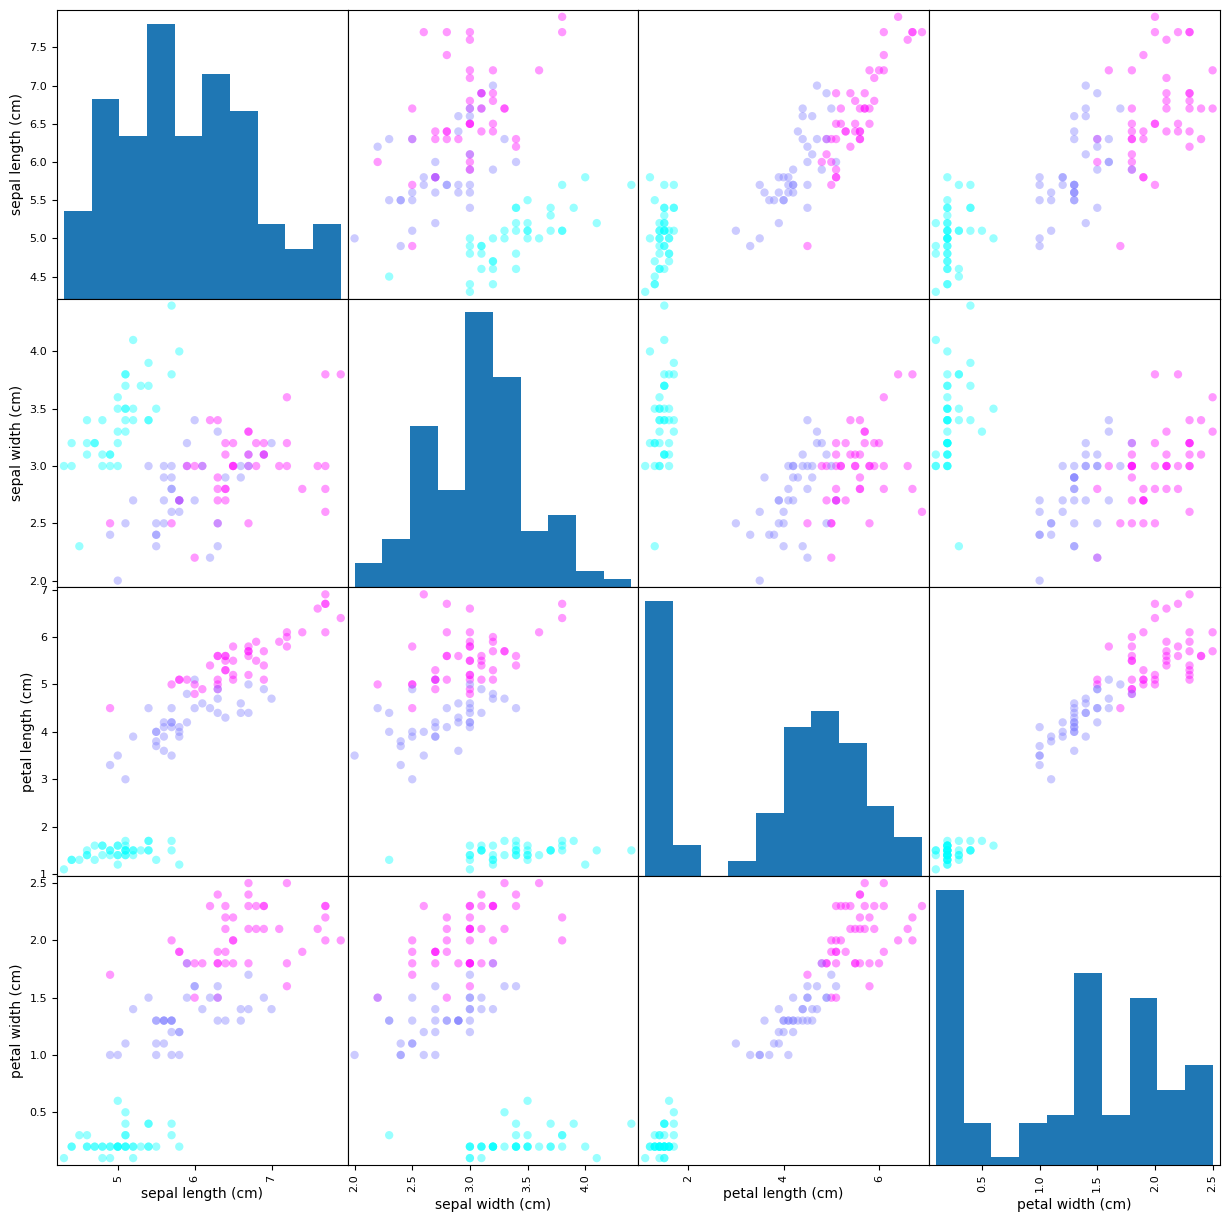

In [11]:
pd.plotting.scatter_matrix(iris_dataframe, figsize=(15,15), marker='o', c=y_train, cmap='cool', alpha=0.4)

plt.show()

## *kNN algorithm*

Check closest n values and classify as superior one.

In [12]:
# kNN algorithm

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1) #set number of neighbors to check

In [13]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [14]:
# Prediction and evaluation

import numpy as np
X_new = np.array([[5, 2.9, 1, 0.2]]) #make sample data for predict

prediction = knn.predict(X_new)
print('Prediction: ', iris_data['target_names'][prediction])

Prediction:  ['setosa']


In [15]:
y_pred = knn.predict(X_test)
print('Prediciton: for test: \n', iris_data['target_names'][y_pred])

Prediciton: for test: 
 ['virginica' 'versicolor' 'setosa' 'virginica' 'setosa' 'virginica'
 'setosa' 'versicolor' 'versicolor' 'versicolor' 'virginica' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'setosa' 'versicolor' 'versicolor'
 'setosa' 'setosa' 'virginica' 'versicolor' 'setosa' 'setosa' 'virginica'
 'setosa' 'setosa' 'versicolor' 'versicolor' 'setosa']


In [16]:
print('Accuracy of model: ', np.mean(y_pred == y_test)*100)
print('Accuracy of model: ', knn.score(X_test, y_test)*100) #recommend to use method

Accuracy of model:  100.0
Accuracy of model:  100.0
